# Image classification

In [1]:
!pip install perceiver-io==0.2.1

     |████████████████████████████████| 409 kB 13.6 MB/s 
     |████████████████████████████████| 584 kB 65.1 MB/s 
     |████████████████████████████████| 6.6 MB 44.7 MB/s 
     |████████████████████████████████| 248 kB 67.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 316 kB 68.8 MB/s 
     |████████████████████████████████| 135 kB 69.6 MB/s 
     |████████████████████████████████| 136 kB 71.3 MB/s 
     |████████████████████████████████| 596 kB 65.7 MB/s 
     |████████████████████████████████| 1.1 MB 58.4 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 144 kB 67.1 MB/s 
     |████████████████████████████████| 271 kB 60.6 MB/s 
  Created wheel for fairscale: filename=fairscale-0.4.6-py3-none-any.whl size=307252 sha256=c01fd7bc1cec6d27c89bb0ad584c283f2c05162e25c20

In [2]:
# Download model checkpoints
!wget -nc -O logs.zip https://martin-krasser.com/perceiver/logs-update-3.zip
!unzip -qo logs.zip

--2022-05-09 15:26:18--  https://martin-krasser.com/perceiver/logs-update-3.zip
Resolving martin-krasser.com (martin-krasser.com)... 217.160.0.142, 2001:8d8:100f:f000::209
Connecting to martin-krasser.com (martin-krasser.com)|217.160.0.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44295508 (42M) [application/zip]
Saving to: ‘logs.zip’

logs.zip            100%[===================>]  42.24M  14.3MB/s    in 3.0s    

2022-05-09 15:26:22 (14.3 MB/s) - ‘logs.zip’ saved [44295508/44295508]



In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
from perceiver.data.mnist_preproc import MnistPreprocessor
from perceiver.model.lightning import LitImageClassifier

In [4]:
mnist = MNIST(root='.cache', download=True, train=False)
mnist_preproc = MnistPreprocessor()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/train-images-idx3-ubyte.gz to .cache/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/train-labels-idx1-ubyte.gz to .cache/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/t10k-images-idx3-ubyte.gz to .cache/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/t10k-labels-idx1-ubyte.gz to .cache/MNIST/raw



In [5]:
ckpt_path = 'logs/img_clf/version_0/checkpoints/epoch=018-val_loss=0.092.ckpt'

model = LitImageClassifier.load_from_checkpoint(ckpt_path).model
model.eval();

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
cols, rows = 3, 3
imgs = [mnist[i][0] for i in range(cols * rows)]

In [7]:
with torch.no_grad():
    logits = model(mnist_preproc.preprocess_batch(imgs))
    preds = logits.argmax(dim=1)

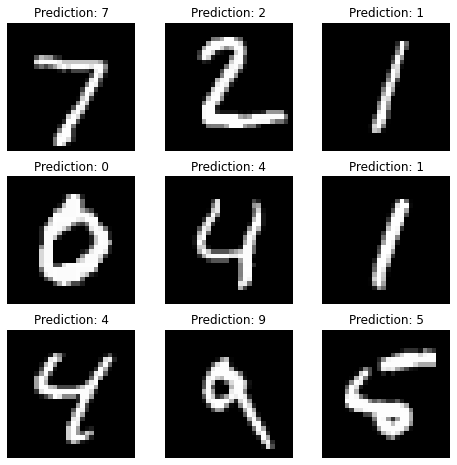

In [8]:
plt.figure(figsize=(8, 8))
for i, (img, pred) in enumerate(zip(imgs, preds)):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(f'Prediction: {pred}')
    plt.imshow(np.array(img), cmap='gray')